### 目的
- kerasと自作の重みを確認

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
import os

def set_seed(seed = 42):
    tf.random.set_seed(seed)

    # optional
    # for numpy.random
    np.random.seed(seed)
    # for built-in random
    random.seed(seed)
    
import keras
from keras.datasets import mnist
from keras import regularizers
from keras.models import Model
from keras.layers import Dense, Dropout, Input
from keras.optimizers import Adam

# MNISTデータを読込む
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# MNISTデータを加工する
x_train  = x_train.reshape(60000, 784)
x_test   = x_test.reshape(10000, 784)
x_train  = x_train.astype('float32')
x_test   = x_test.astype('float32')
x_train /= 255
x_test  /= 255
y_train  = keras.utils.to_categorical(y_train, 10)
y_test   = keras.utils.to_categorical(y_test, 10)

In [11]:
#dir(Dense(10))

# 中間層変更モデル

In [55]:


# モデルの構築
inputs = Input(shape=(784,))

x = Dense(784, activation='relu', kernel_initializer='he_normal')(inputs)
x = Dense(784, activation='relu',kernel_initializer='he_normal')(x)
x = Dense(10, activation='softmax')(x)
#x4 = x2 + x3
model = Model(inputs=inputs, outputs=x)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [56]:
a,b= model.layers[1].get_weights()
len(a),len(b)
a.min(),a.max()

(-0.11483725, 0.11483626)

In [57]:
a,b= model.layers[2].get_weights()
len(a),len(b)
a.min(),a.max()

(-0.11483885, 0.114830784)

In [68]:
b = np.random.randn(784,784) * np.sqrt(2.0/784) 

In [69]:
b.max(), b.min()

(0.2396964017803427, -0.2368472782501596)

(-0.06185891, 0.061858643)

In [24]:
a.shape

(784, 784)

In [20]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [91]:
w1_normal, w2_normal = model.layers[1].get_weights()[0],model.layers[2].get_weights()[0]

In [98]:
#for w in w1_normal:
#    print(w.shape)

(array([ 8.,  8., 13.,  9.,  8., 15., 13.,  5., 11., 10.]),
 array([-0.04880542, -0.0389318 , -0.02905818, -0.01918457, -0.00931095,
         0.00056266,  0.01043628,  0.02030989,  0.03018351,  0.04005712,
         0.04993074], dtype=float32),
 <a list of 10 Patch objects>)

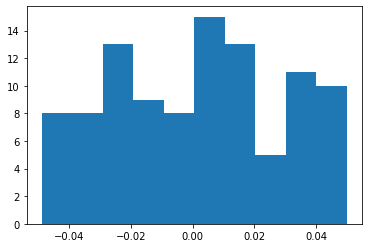

In [94]:
plt.hist(w1_normal[0])

# Dropout

In [65]:
inputs = Input(shape=(784,))

x = Dense(784, activation='relu',kernel_initializer='random_uniform', name = "hoge")(inputs)
x = Dense(784, activation='relu',kernel_initializer='random_uniform')(inputs)
x = Dropout(0.5, seed=42)(x)
x = Dense(10, activation='softmax', kernel_initializer='random_uniform')(x)
#x4 = x2 + x3
model = Model(inputs=inputs, outputs=x)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 学習
epochs = 5
batch_size = 128
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

# 検証
score = model.evaluate(x_test, y_test, verbose=1)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.5472 - accuracy: 0.8425 - val_loss: 0.1450 - val_accuracy: 0.9574
Epoch 2/5
469/469 [==============================] - 6s 12ms/step - loss: 0.1562 - accuracy: 0.9554 - val_loss: 0.0999 - val_accuracy: 0.9711
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1133 - accuracy: 0.9660 - val_loss: 0.0859 - val_accuracy: 0.9741
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0871 - accuracy: 0.9731 - val_loss: 0.0731 - val_accuracy: 0.9778
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0630 - accuracy: 0.9802

Test loss: 0.06303290277719498
Test accuracy: 0.9801999926567078


In [66]:
model.layers

(array([  9.,  37.,  95., 169., 188., 151.,  90.,  33.,  11.,   1.]),
 array([-0.10077626, -0.07640316, -0.05203008, -0.02765699, -0.0032839 ,
         0.02108919,  0.04546228,  0.06983536,  0.09420846,  0.11858154,
         0.14295463], dtype=float32),
 <a list of 10 Patch objects>)

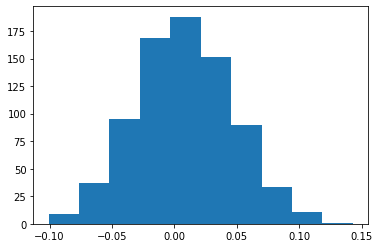

In [67]:
w1, w2 = model.layers[1].get_weights()[1],model.layers[2].get_weights()
plt.hist(w1)

### L1 loss

In [86]:

inputs = Input(shape=(784,))
lamda1= 0.001
x = Dense(784, activation='relu',kernel_initializer='random_uniform', kernel_regularizer=regularizers.l1(lamda1))(inputs)
x = Dense(784, activation='relu',kernel_initializer='random_uniform',kernel_regularizer=regularizers.l1(lamda1))(inputs)
x = Dense(10, activation='softmax', kernel_initializer='random_uniform',kernel_regularizer=regularizers.l1(lamda1))(x)
#x4 = x2 + x3
model = Model(inputs=inputs, outputs=x)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 学習
epochs = 10
batch_size = 128
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

# 検証
score = model.evaluate(x_test, y_test, verbose=1)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
469/469 [==============================] - 7s 13ms/step - loss: 4.1352 - accuracy: 0.8093 - val_loss: 1.0311 - val_accuracy: 0.8933
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 0.9961 - accuracy: 0.8847 - val_loss: 0.8389 - val_accuracy: 0.9031
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.8421 - accuracy: 0.8969 - val_loss: 0.7623 - val_accuracy: 0.9058
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 0.7585 - accuracy: 0.9057 - val_loss: 0.6952 - val_accuracy: 0.9170
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.6985 - accuracy: 0.9149 - val_loss: 0.6606 - val_accuracy: 0.9213
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.6708 - accuracy: 0.9179 - val_loss: 0.6379 - val_accuracy: 0.9246
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.6446 - accuracy: 0.9212 - val_loss: 0.6277 - val_accuracy: 0.9265
Ep

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-0.8589173 , -0.7115295 , -0.56414163, -0.4167538 , -0.26936597,
        -0.12197813,  0.0254097 ,  0.17279753,  0.32018536,  0.4675732 ,
         0.614961  ], dtype=float32),
 <a list of 784 Lists of Patches objects>)

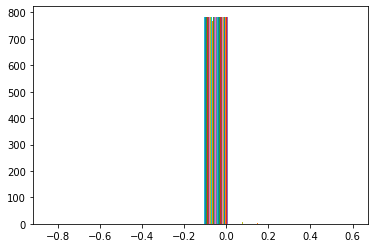

In [88]:
w1, w2 = model.layers[1].get_weights()[0],model.layers[2].get_weights()[0]
plt.hist(w1)

In [89]:
w1[0]

array([ 1.37226365e-04, -9.02152824e-05,  3.07791124e-05,  8.05386007e-05,
        4.25530488e-05, -9.80139157e-05,  2.37027183e-04,  2.71856872e-04,
       -5.82511275e-05,  5.30338002e-06, -6.39396458e-05, -7.70007246e-05,
        1.78689981e-04,  6.28320995e-05,  2.07129080e-04, -2.08741971e-04,
       -2.57104781e-04, -1.40178599e-05,  2.27991986e-04,  1.66978789e-05,
        1.67638034e-04,  7.42092816e-05, -1.77329275e-04, -5.12280239e-05,
       -6.42707892e-05, -9.75342846e-06, -3.74850060e-06,  7.45295256e-06,
        9.58788150e-05,  5.34111314e-05, -2.58032778e-05, -1.13239366e-05,
       -4.27124760e-04,  1.68120241e-04, -9.51187758e-05,  1.32080386e-05,
        6.17589467e-05, -3.12195334e-06,  2.77000509e-04, -2.06597208e-04,
       -6.98770891e-05, -9.50850881e-05, -2.06373334e-05, -1.23297883e-04,
       -1.48998937e-04, -1.14242532e-04,  3.51406110e-04,  1.75378809e-05,
        2.40272551e-04,  1.34859962e-04,  1.53130255e-04, -2.50566867e-04,
       -3.72608920e-05,  

In [81]:
w1_normal, w2_normal

(array([ 2.76551414e-02,  6.33960590e-02,  1.67887881e-02,  1.70453377e-02,
         3.39185819e-02,  2.81291120e-02, -1.38294315e-02,  5.02941478e-03,
         2.06755605e-02, -1.48576899e-02, -1.10480459e-02,  3.52309644e-02,
        -9.20428522e-03,  1.54305827e-02, -2.43159439e-02,  4.48304834e-03,
         4.45353752e-03,  3.21752168e-02,  3.26458216e-02, -4.52606715e-02,
        -8.21170118e-03, -1.49872787e-02, -7.04619242e-03,  3.58011462e-02,
        -1.21901706e-02,  6.62941067e-03, -1.08156325e-02,  1.19552168e-03,
         5.01031913e-02,  2.97915433e-02, -1.69000635e-03,  1.35188876e-02,
         3.83059960e-03,  3.94525640e-02, -3.87112908e-02, -3.43945157e-03,
        -2.26101410e-02, -4.65853605e-03,  5.40440977e-02,  3.58908176e-02,
         3.83629650e-03,  6.34379045e-04,  1.48537557e-03,  4.51090978e-03,
        -1.95236586e-03,  1.10584432e-02, -1.89232361e-03, -1.07738944e-02,
         6.61257841e-03, -2.63737086e-02,  2.22636126e-02,  1.03126345e-02,
         2.4

In [ ]:
for i in range(self.epochs):
            #copy.deepcopyにしないとself.trainが全て変わる
    t_x = data_loader(copy.deepcopy(self.train_x), seed = i,batch_size = self.batch_size )
    t_y = data_loader(copy.deepcopy(self.train_y), batch_size = self.batch_size , seed = i)

    
    for batch_x,batch_y in zip(t_x, t_y):
        y = model.forward(batch_x)
        model.backward(y =  y , t = batch_y)

    y = model.forward(self.train_x)
    model.loss_cal(y,self.train_y, binary= self.binary )
    y = model.forward(self.val_x)
    model.loss_cal(y,self.val_y, is_train = False,binary= self.binary )
